In [1]:
import matplotlib.pyplot as plt
import numpy as np
from clusters.ammonia import Ammonia
from systems_vde import systems
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

In [2]:
colors = {
    21: "orangered", 
    22: "orangered",
    34: "skyblue",  # Změněno pro systém 34
    41: "green", 
    42: "green", 
    44: "green",
    51: "blueviolet",   # Změněno pro systém 51
    54: "blueviolet",   # Změněno pro systém 54
    62: "goldenrod",    # Změněno pro systém 62
    71: "chocolate",
    81: "crimson",    # Změněno pro systém 81
    82: "crimson",          # Změněno pro systém 82
    83: "crimson",           # Změněno pro systém 83
}

In [3]:
def vde_mp2(sys):
    frames, electron, neutral = np.loadtxt(systems[sys].mp2, delimiter=',', unpack=True)

    VDE = []
    for index, frame in enumerate(frames):
        VDE.append((electron[index] - neutral[index]) * 27.211324570273)

    return VDE

In [4]:
ammonia_21 = vde_mp2(21)
ammonia_22 = vde_mp2(22)

ammonia_21_max = max(ammonia_21)
ammonia_22_max = max(ammonia_22)

ammonia_34 = vde_mp2(34)
ammonia_34_max = max(ammonia_34)

ammonia_41 = vde_mp2(41)
ammonia_42 = vde_mp2(42)
ammonia_44 = vde_mp2(44)

ammonia_41_max = max(ammonia_41)
ammonia_42_max = max(ammonia_42)
ammonia_44_max = max(ammonia_44)

ammonia_51 = vde_mp2(51)
ammonia_54 = vde_mp2(54)

ammonia_51_max = max(ammonia_51)
ammonia_54_max = max(ammonia_54)

ammonia_62 = vde_mp2(62)
ammonia_62_max = max(ammonia_62)

ammonia_71 = vde_mp2(71)
ammonia_71_max = max(ammonia_71)

ammonia_81 = vde_mp2(81)
ammonia_82 = vde_mp2(82)
ammonia_83 = vde_mp2(83)

ammonia_81_max = max(ammonia_81)
ammonia_82_max = max(ammonia_82)
ammonia_83_max = max(ammonia_83)

systems_mp2 = {
    21: [ammonia_21],
    22: [ammonia_22],
    34: [ammonia_34],
    41: [ammonia_41],
    42: [ammonia_42],
    44: [ammonia_44],
    51: [ammonia_51],
    54: [ammonia_54],
    62: [ammonia_62],
    71: [ammonia_71],
    81: [ammonia_81],
    82: [ammonia_82],
    83: [ammonia_83], }

for i in systems_mp2.keys():
  systems_mp2[i].append(colors[i])
  

for i in systems_mp2.keys():
    data = systems_mp2[i][0]

    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), 10000)
    kde_values = kde(x_values)
    peaks, _ = find_peaks(kde_values)

    kde_max = []
    for peak in peaks:
        values = [kde_values[peak], x_values[peak]]
        kde_max.append(values)

    max_peak = max(kde_max)

    systems_mp2[i].append(max_peak)

In [5]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(16, 9))
# 
# 
# for i in ['21 ammonia','22 ammonia', '34 ammonia']:
#     sns.kdeplot(data=systems_mp2[i][0], fill=True, lw=2, label=i, color=systems_mp2[i][1])
#     
#     x = [systems_mp2[i][3][1], systems_mp2[i][3][1]]
#     y = [0, systems_mp2[i][3][0]]
#     
#     plt.plot(x,y, color=systems_mp2[i][1], linestyle='--')
#     
#     plt.text(systems_mp2[i][3][1] - 0.02, systems_mp2[i][3][0] * 1.04, f'{systems_mp2[i][3][1]:.4f}', fontweight='bold')
# 
# plt.ylim(0, 7.25)
# plt.legend(loc='upper left')
# plt.show()

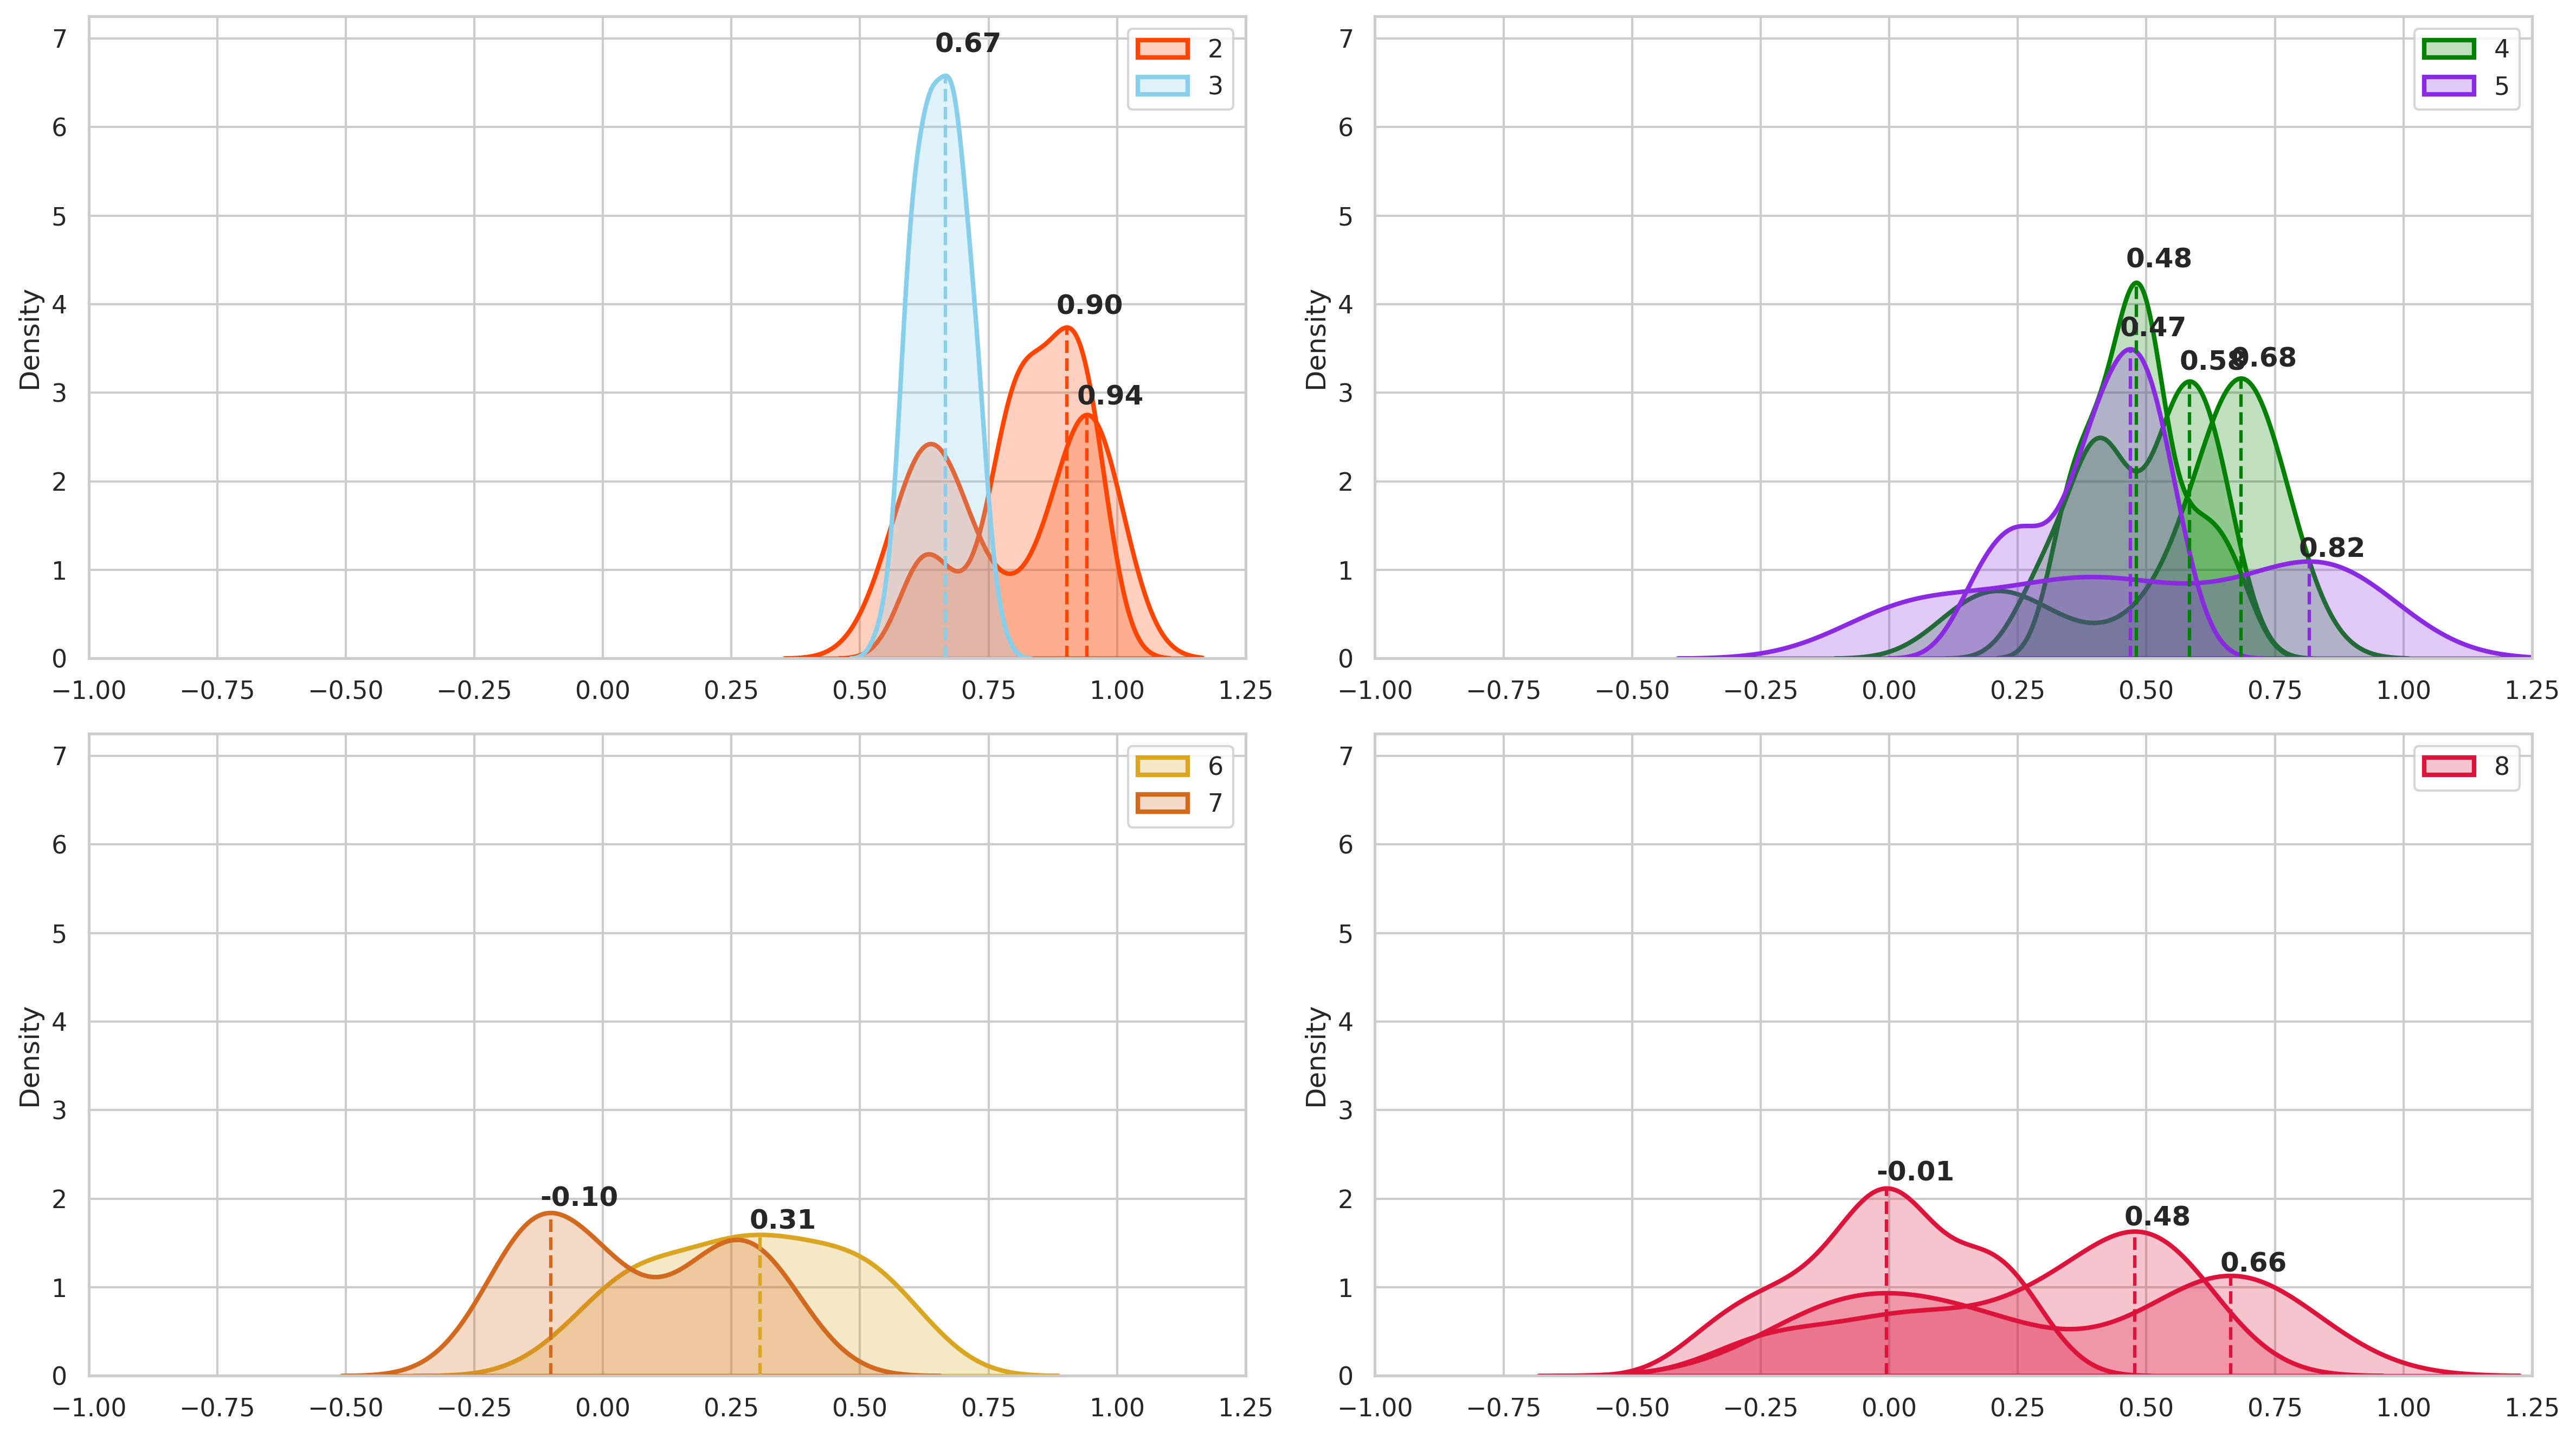

In [6]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(16, 9), dpi=300)

# 21
sns.kdeplot(data=systems_mp2[21][0], ax=ax[0, 0], fill=True, lw=2, label='2', color=systems_mp2[21][1])
x = [systems_mp2[21][2][1], systems_mp2[21][2][1]]
y = [0, systems_mp2[21][2][0]]
ax[0, 0].plot(x, y, color=systems_mp2[21][1], linestyle='--')
ax[0, 0].text(systems_mp2[21][2][1] - 0.02, systems_mp2[21][2][0] * 1.04, f'{systems_mp2[21][2][1]:.2f}',
              fontweight='bold')

# 22
sns.kdeplot(data=systems_mp2[22][0], ax=ax[0, 0], fill=True, lw=2, color=systems_mp2[22][1])
x = [systems_mp2[22][2][1], systems_mp2[22][2][1]]
y = [0, systems_mp2[22][2][0]]
ax[0, 0].plot(x, y, color=systems_mp2[22][1], linestyle='--')
ax[0, 0].text(systems_mp2[22][2][1] - 0.02, systems_mp2[22][2][0] * 1.04, f'{systems_mp2[22][2][1]:.2f}',
              fontweight='bold')

# 34
sns.kdeplot(data=systems_mp2[34][0], ax=ax[0, 0], fill=True, lw=2, label='3', color=systems_mp2[34][1])
x = [systems_mp2[34][2][1], systems_mp2[34][2][1]]
y = [0, systems_mp2[34][2][0]]
ax[0, 0].plot(x, y, color=systems_mp2[34][1], linestyle='--')
ax[0, 0].text(systems_mp2[34][2][1] - 0.02, systems_mp2[34][2][0] * 1.04, f'{systems_mp2[34][2][1]:.2f}',
              fontweight='bold')
ax[0, 0].legend()
ax[0, 0].set_ylim(0, 7.25)
ax[0, 0].set_xlim(-1, 1.25)

###
# 41
sns.kdeplot(data=systems_mp2[41][0], ax=ax[0, 1], fill=True, lw=2, label='4', color=systems_mp2[41][1])
x = [systems_mp2[41][2][1], systems_mp2[41][2][1]]
y = [0, systems_mp2[41][2][0]]
ax[0, 1].plot(x, y, color=systems_mp2[41][1], linestyle='--')
ax[0, 1].text(systems_mp2[41][2][1] - 0.02, systems_mp2[41][2][0] * 1.04, f'{systems_mp2[41][2][1]:.2f}',
              fontweight='bold')

# 42
sns.kdeplot(data=systems_mp2[42][0], ax=ax[0, 1], fill=True, lw=2, color=systems_mp2[42][1])
x = [systems_mp2[42][2][1], systems_mp2[42][2][1]]
y = [0, systems_mp2[42][2][0]]
ax[0, 1].plot(x, y, color=systems_mp2[42][1], linestyle='--')
ax[0, 1].text(systems_mp2[42][2][1] - 0.02, systems_mp2[42][2][0] * 1.04, f'{systems_mp2[42][2][1]:.2f}',
              fontweight='bold')

# 44 
sns.kdeplot(data=systems_mp2[44][0], ax=ax[0, 1], fill=True, lw=2, color=systems_mp2[44][1])
x = [systems_mp2[44][2][1], systems_mp2[44][2][1]]
y = [0, systems_mp2[44][2][0]]
ax[0, 1].plot(x, y, color=systems_mp2[44][1], linestyle='--')
ax[0, 1].text(systems_mp2[44][2][1] - 0.02, systems_mp2[44][2][0] * 1.04, f'{systems_mp2[44][2][1]:.2f}',
              fontweight='bold')

# 51
sns.kdeplot(data=systems_mp2[51][0], ax=ax[0, 1], fill=True, lw=2, label='5', color=systems_mp2[51][1])
x = [systems_mp2[51][2][1], systems_mp2[51][2][1]]
y = [0, systems_mp2[51][2][0]]
ax[0, 1].plot(x, y, color=systems_mp2[51][1], linestyle='--')
ax[0, 1].text(systems_mp2[51][2][1] - 0.02, systems_mp2[51][2][0] * 1.04, f'{systems_mp2[51][2][1]:.2f}',
              fontweight='bold')

# 54
sns.kdeplot(data=systems_mp2[54][0], ax=ax[0, 1], fill=True, lw=2, color=systems_mp2[54][1])
x = [systems_mp2[54][2][1], systems_mp2[54][2][1]]
y = [0, systems_mp2[54][2][0]]
ax[0, 1].plot(x, y, color=systems_mp2[54][1], linestyle='--')
ax[0, 1].text(systems_mp2[54][2][1] - 0.02, systems_mp2[54][2][0] * 1.04, f'{systems_mp2[54][2][1]:.2f}',
              fontweight='bold')
ax[0, 1].legend()
ax[0, 1].set_ylim(0, 7.25)
ax[0, 1].set_xlim(-1, 1.25)

###
# 62
sns.kdeplot(data=systems_mp2[62][0], ax=ax[1, 0], fill=True, lw=2, label='6', color=systems_mp2[62][1])
x = [systems_mp2[62][2][1], systems_mp2[62][2][1]]
y = [0, systems_mp2[62][2][0]]
ax[1, 0].plot(x, y, color=systems_mp2[62][1], linestyle='--')
ax[1, 0].text(systems_mp2[62][2][1] - 0.02, systems_mp2[62][2][0] * 1.04, f'{systems_mp2[62][2][1]:.2f}',
              fontweight='bold')

# 71
sns.kdeplot(data=systems_mp2[71][0], ax=ax[1, 0], fill=True, lw=2, label='7', color=systems_mp2[71][1])
x = [systems_mp2[71][2][1], systems_mp2[71][2][1]]
y = [0, systems_mp2[71][2][0]]
ax[1, 0].plot(x, y, color=systems_mp2[71][1], linestyle='--')
ax[1, 0].text(systems_mp2[71][2][1] - 0.02, systems_mp2[71][2][0] * 1.04, f'{systems_mp2[71][2][1]:.2f}',
              fontweight='bold')
ax[1, 0].legend()
ax[1, 0].set_ylim(0, 7.25)
ax[1, 0].set_xlim(-1, 1.25)

###
# 81
sns.kdeplot(data=systems_mp2[81][0], ax=ax[1, 1], fill=True, lw=2, label='8', color=systems_mp2[81][1])
x = [systems_mp2[81][2][1], systems_mp2[81][2][1]]
y = [0, systems_mp2[81][2][0]]
ax[1, 1].plot(x, y, color=systems_mp2[81][1], linestyle='--')
ax[1, 1].text(systems_mp2[81][2][1] - 0.02, systems_mp2[81][2][0] * 1.04, f'{systems_mp2[81][2][1]:.2f}',
              fontweight='bold')

# 82
sns.kdeplot(data=systems_mp2[82][0], ax=ax[1, 1], fill=True, lw=2, color=systems_mp2[82][1])
x = [systems_mp2[82][2][1], systems_mp2[82][2][1]]
y = [0, systems_mp2[82][2][0]]
ax[1, 1].plot(x, y, color=systems_mp2[82][1], linestyle='--')
ax[1, 1].text(systems_mp2[82][2][1] - 0.02, systems_mp2[82][2][0] * 1.04, f'{systems_mp2[82][2][1]:.2f}',
              fontweight='bold')

# 83
sns.kdeplot(data=systems_mp2[83][0], ax=ax[1, 1], fill=True, lw=2, color=systems_mp2[83][1])
x = [systems_mp2[83][2][1], systems_mp2[83][2][1]]
y = [0, systems_mp2[83][2][0]]
ax[1, 1].plot(x, y, color=systems_mp2[83][1], linestyle='--')
ax[1, 1].text(systems_mp2[83][2][1] - 0.02, systems_mp2[83][2][0] * 1.04, f'{systems_mp2[83][2][1]:.2f}',
              fontweight='bold')
ax[1, 1].legend()
ax[1, 1].set_ylim(0, 7.25)
ax[1, 1].set_xlim(-1, 1.25)
# ax[1, 1].set_xlim(-0.75, 1.25)

plt.tight_layout()
plt.show()

In [7]:
def vde_b3lyp(sys):
    frames, electron, neutral = np.loadtxt(systems[sys].b3lyp, delimiter=',', unpack=True)

    VDE = []
    for index, frame in enumerate(frames):
        VDE.append((electron[index] - neutral[index]) * 27.211324570273)

    return VDE

In [8]:
ammonia_21 = vde_b3lyp(21)
ammonia_22 = vde_b3lyp(22)

# ammonia_21_max = max(ammonia_21)
# ammonia_22_max = max(ammonia_22)

ammonia_34 = vde_b3lyp(34)
# ammonia_34_max = max(ammonia_34)

ammonia_41 = vde_b3lyp(41)
ammonia_42 = vde_b3lyp(42)
ammonia_44 = vde_b3lyp(44)

# ammonia_41_max = max(ammonia_41)
# ammonia_42_max = max(ammonia_42)
# ammonia_44_max = max(ammonia_44)

ammonia_51 = vde_b3lyp(51)
ammonia_54 = vde_b3lyp(54)

# ammonia_51_max = max(ammonia_51)
# ammonia_54_max = max(ammonia_54)

ammonia_62 = vde_b3lyp(62)
# ammonia_62_max = max(ammonia_62)

ammonia_71 = vde_b3lyp(71)
# ammonia_71_max = max(ammonia_71)

ammonia_81 = vde_b3lyp(81)
ammonia_82 = vde_b3lyp(82)
ammonia_83 = vde_b3lyp(83)

# ammonia_81_max = max(ammonia_81)
# ammonia_82_max = max(ammonia_82)
# ammonia_83_max = max(ammonia_83)

systems_b3lyp = {
    21: [ammonia_21],
    22: [ammonia_22],
    34: [ammonia_34],
    41: [ammonia_41],
    42: [ammonia_42],
    44: [ammonia_44],
    51: [ammonia_51],
    54: [ammonia_54],
    62: [ammonia_62],
    71: [ammonia_71],
    81: [ammonia_81],
    82: [ammonia_82],
    83: [ammonia_83], 
    }

for i in systems_b3lyp.keys():
  systems_b3lyp[i].append(colors[i])
  

for i in systems_b3lyp.keys():
    data = systems_b3lyp[i][0]

    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), 10000)
    kde_values = kde(x_values)
    peaks, _ = find_peaks(kde_values)

    kde_max = []
    for peak in peaks:
        values = [kde_values[peak], x_values[peak]]
        kde_max.append(values)

    max_peak = max(kde_max)

    systems_b3lyp[i].append(max_peak)

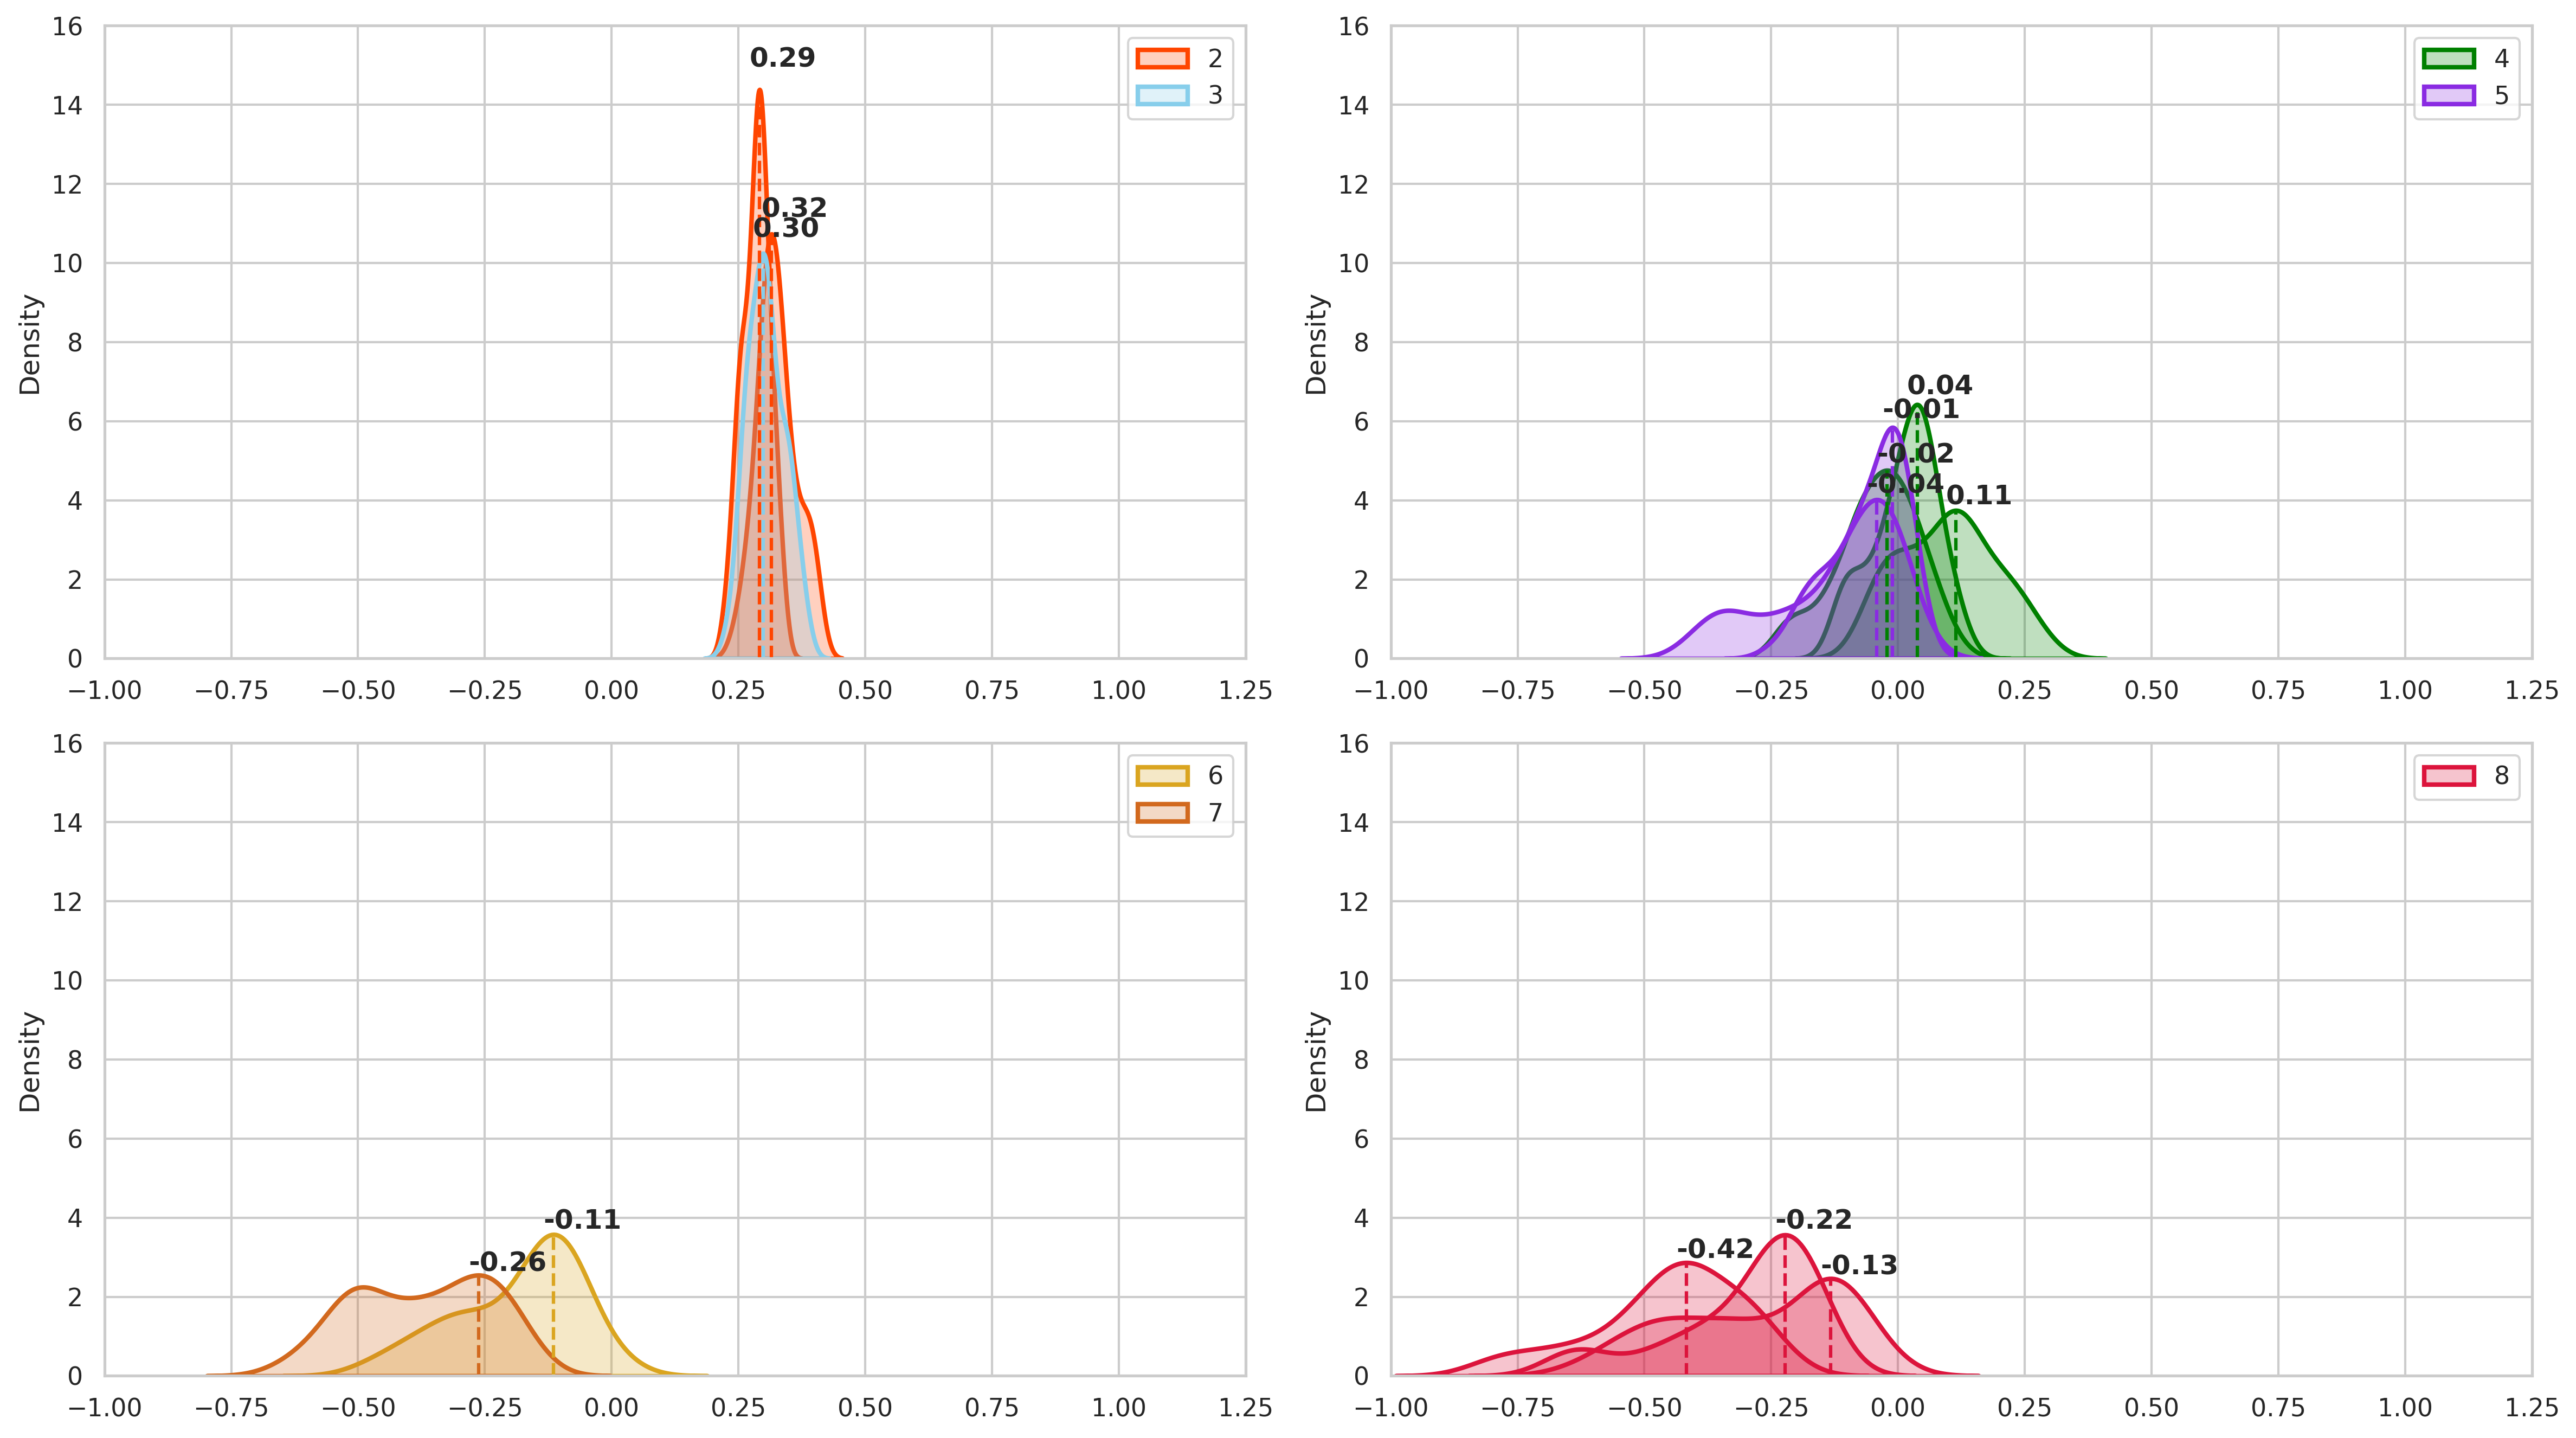

In [9]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(16, 9), dpi=300)

# 21
sns.kdeplot(data=systems_b3lyp[21][0], ax=ax[0, 0], fill=True, lw=2, label='2', color=systems_b3lyp[21][1])
x = [systems_b3lyp[21][2][1], systems_b3lyp[21][2][1]]
y = [0, systems_b3lyp[21][2][0]]
ax[0, 0].plot(x, y, color=systems_b3lyp[21][1], linestyle='--')
ax[0, 0].text(systems_b3lyp[21][2][1] - 0.02, systems_b3lyp[21][2][0] * 1.04, f'{systems_b3lyp[21][2][1]:.2f}',
              fontweight='bold')

# 22
sns.kdeplot(data=systems_b3lyp[22][0], ax=ax[0, 0], fill=True, lw=2, color=systems_b3lyp[22][1])
x = [systems_b3lyp[22][2][1], systems_b3lyp[22][2][1]]
y = [0, systems_b3lyp[22][2][0]]
ax[0, 0].plot(x, y, color=systems_b3lyp[22][1], linestyle='--')
ax[0, 0].text(systems_b3lyp[22][2][1] - 0.02, systems_b3lyp[22][2][0] * 1.04, f'{systems_b3lyp[22][2][1]:.2f}',
              fontweight='bold')

# 34
sns.kdeplot(data=systems_b3lyp[34][0], ax=ax[0, 0], fill=True, lw=2, label='3', color=systems_b3lyp[34][1])
x = [systems_b3lyp[34][2][1], systems_b3lyp[34][2][1]]
y = [0, systems_b3lyp[34][2][0]]
ax[0, 0].plot(x, y, color=systems_b3lyp[34][1], linestyle='--')
ax[0, 0].text(systems_b3lyp[34][2][1] - 0.02, systems_b3lyp[34][2][0] * 1.04, f'{systems_b3lyp[34][2][1]:.2f}',
              fontweight='bold')
ax[0, 0].legend()
ax[0, 0].set_ylim(0, 16)
ax[0, 0].set_xlim(-1, 1.25)
###
# 41
sns.kdeplot(data=systems_b3lyp[41][0], ax=ax[0, 1], fill=True, lw=2, label='4', color=systems_b3lyp[41][1])
x = [systems_b3lyp[41][2][1], systems_b3lyp[41][2][1]]
y = [0, systems_b3lyp[41][2][0]]
ax[0, 1].plot(x, y, color=systems_b3lyp[41][1], linestyle='--')
ax[0, 1].text(systems_b3lyp[41][2][1] - 0.02, systems_b3lyp[41][2][0] * 1.04, f'{systems_b3lyp[41][2][1]:.2f}',
              fontweight='bold')

# 42
sns.kdeplot(data=systems_b3lyp[42][0], ax=ax[0, 1], fill=True, lw=2, color=systems_b3lyp[42][1])
x = [systems_b3lyp[42][2][1], systems_b3lyp[42][2][1]]
y = [0, systems_b3lyp[42][2][0]]
ax[0, 1].plot(x, y, color=systems_b3lyp[42][1], linestyle='--')
ax[0, 1].text(systems_b3lyp[42][2][1] - 0.02, systems_b3lyp[42][2][0] * 1.04, f'{systems_b3lyp[42][2][1]:.2f}',
              fontweight='bold')

# 44 
sns.kdeplot(data=systems_b3lyp[44][0], ax=ax[0, 1], fill=True, lw=2, color=systems_b3lyp[44][1])
x = [systems_b3lyp[44][2][1], systems_b3lyp[44][2][1]]
y = [0, systems_b3lyp[44][2][0]]
ax[0, 1].plot(x, y, color=systems_b3lyp[44][1], linestyle='--')
ax[0, 1].text(systems_b3lyp[44][2][1] - 0.02, systems_b3lyp[44][2][0] * 1.04, f'{systems_b3lyp[44][2][1]:.2f}',
              fontweight='bold')

# 51
sns.kdeplot(data=systems_b3lyp[51][0], ax=ax[0, 1], fill=True, lw=2, label='5', color=systems_b3lyp[51][1])
x = [systems_b3lyp[51][2][1], systems_b3lyp[51][2][1]]
y = [0, systems_b3lyp[51][2][0]]
ax[0, 1].plot(x, y, color=systems_b3lyp[51][1], linestyle='--')
ax[0, 1].text(systems_b3lyp[51][2][1] - 0.02, systems_b3lyp[51][2][0] * 1.04, f'{systems_b3lyp[51][2][1]:.2f}',
              fontweight='bold')

# 54
sns.kdeplot(data=systems_b3lyp[54][0], ax=ax[0, 1], fill=True, lw=2, color=systems_b3lyp[54][1])
x = [systems_b3lyp[54][2][1], systems_b3lyp[54][2][1]]
y = [0, systems_b3lyp[54][2][0]]
ax[0, 1].plot(x, y, color=systems_b3lyp[54][1], linestyle='--')
ax[0, 1].text(systems_b3lyp[54][2][1] - 0.02, systems_b3lyp[54][2][0] * 1.04, f'{systems_b3lyp[54][2][1]:.2f}',
              fontweight='bold')
ax[0, 1].legend()
ax[0, 1].set_ylim(0, 16)
ax[0, 1].set_xlim(-1, 1.25)

###
# 62
sns.kdeplot(data=systems_b3lyp[62][0], ax=ax[1, 0], fill=True, lw=2, label='6', color=systems_b3lyp[62][1])
x = [systems_b3lyp[62][2][1], systems_b3lyp[62][2][1]]
y = [0, systems_b3lyp[62][2][0]]
ax[1, 0].plot(x, y, color=systems_b3lyp[62][1], linestyle='--')
ax[1, 0].text(systems_b3lyp[62][2][1] - 0.02, systems_b3lyp[62][2][0] * 1.04, f'{systems_b3lyp[62][2][1]:.2f}',
              fontweight='bold')

# 71
sns.kdeplot(data=systems_b3lyp[71][0], ax=ax[1, 0], fill=True, lw=2, label='7', color=systems_b3lyp[71][1])
x = [systems_b3lyp[71][2][1], systems_b3lyp[71][2][1]]
y = [0, systems_b3lyp[71][2][0]]
ax[1, 0].plot(x, y, color=systems_b3lyp[71][1], linestyle='--')
ax[1, 0].text(systems_b3lyp[71][2][1] - 0.02, systems_b3lyp[71][2][0] * 1.04, f'{systems_b3lyp[71][2][1]:.2f}',
              fontweight='bold')
ax[1, 0].legend()
ax[1, 0].set_ylim(0, 16)
ax[1, 0].set_xlim(-1, 1.25)

###
# 81
sns.kdeplot(data=systems_b3lyp[81][0], ax=ax[1, 1], fill=True, lw=2, label='8', color=systems_b3lyp[81][1])
x = [systems_b3lyp[81][2][1], systems_b3lyp[81][2][1]]
y = [0, systems_b3lyp[81][2][0]]
ax[1, 1].plot(x, y, color=systems_b3lyp[81][1], linestyle='--')
ax[1, 1].text(systems_b3lyp[81][2][1] - 0.02, systems_b3lyp[81][2][0] * 1.04, f'{systems_b3lyp[81][2][1]:.2f}',
              fontweight='bold')

# 82
sns.kdeplot(data=systems_b3lyp[82][0], ax=ax[1, 1], fill=True, lw=2, color=systems_b3lyp[82][1])
x = [systems_b3lyp[82][2][1], systems_b3lyp[82][2][1]]
y = [0, systems_b3lyp[82][2][0]]
ax[1, 1].plot(x, y, color=systems_b3lyp[82][1], linestyle='--')
ax[1, 1].text(systems_b3lyp[82][2][1] - 0.02, systems_b3lyp[82][2][0] * 1.04, f'{systems_b3lyp[82][2][1]:.2f}',
              fontweight='bold')

# 83
sns.kdeplot(data=systems_b3lyp[83][0], ax=ax[1, 1], fill=True, lw=2, color=systems_b3lyp[83][1])
x = [systems_b3lyp[83][2][1], systems_b3lyp[83][2][1]]
y = [0, systems_b3lyp[83][2][0]]
ax[1, 1].plot(x, y, color=systems_b3lyp[83][1], linestyle='--')
ax[1, 1].text(systems_b3lyp[83][2][1] - 0.02, systems_b3lyp[83][2][0] * 1.04, f'{systems_b3lyp[83][2][1]:.2f}',
              fontweight='bold')
ax[1, 1].legend()
ax[1, 1].set_ylim(0, 16)
ax[1, 1].set_xlim(-1, 1.25)

plt.tight_layout()
plt.show()

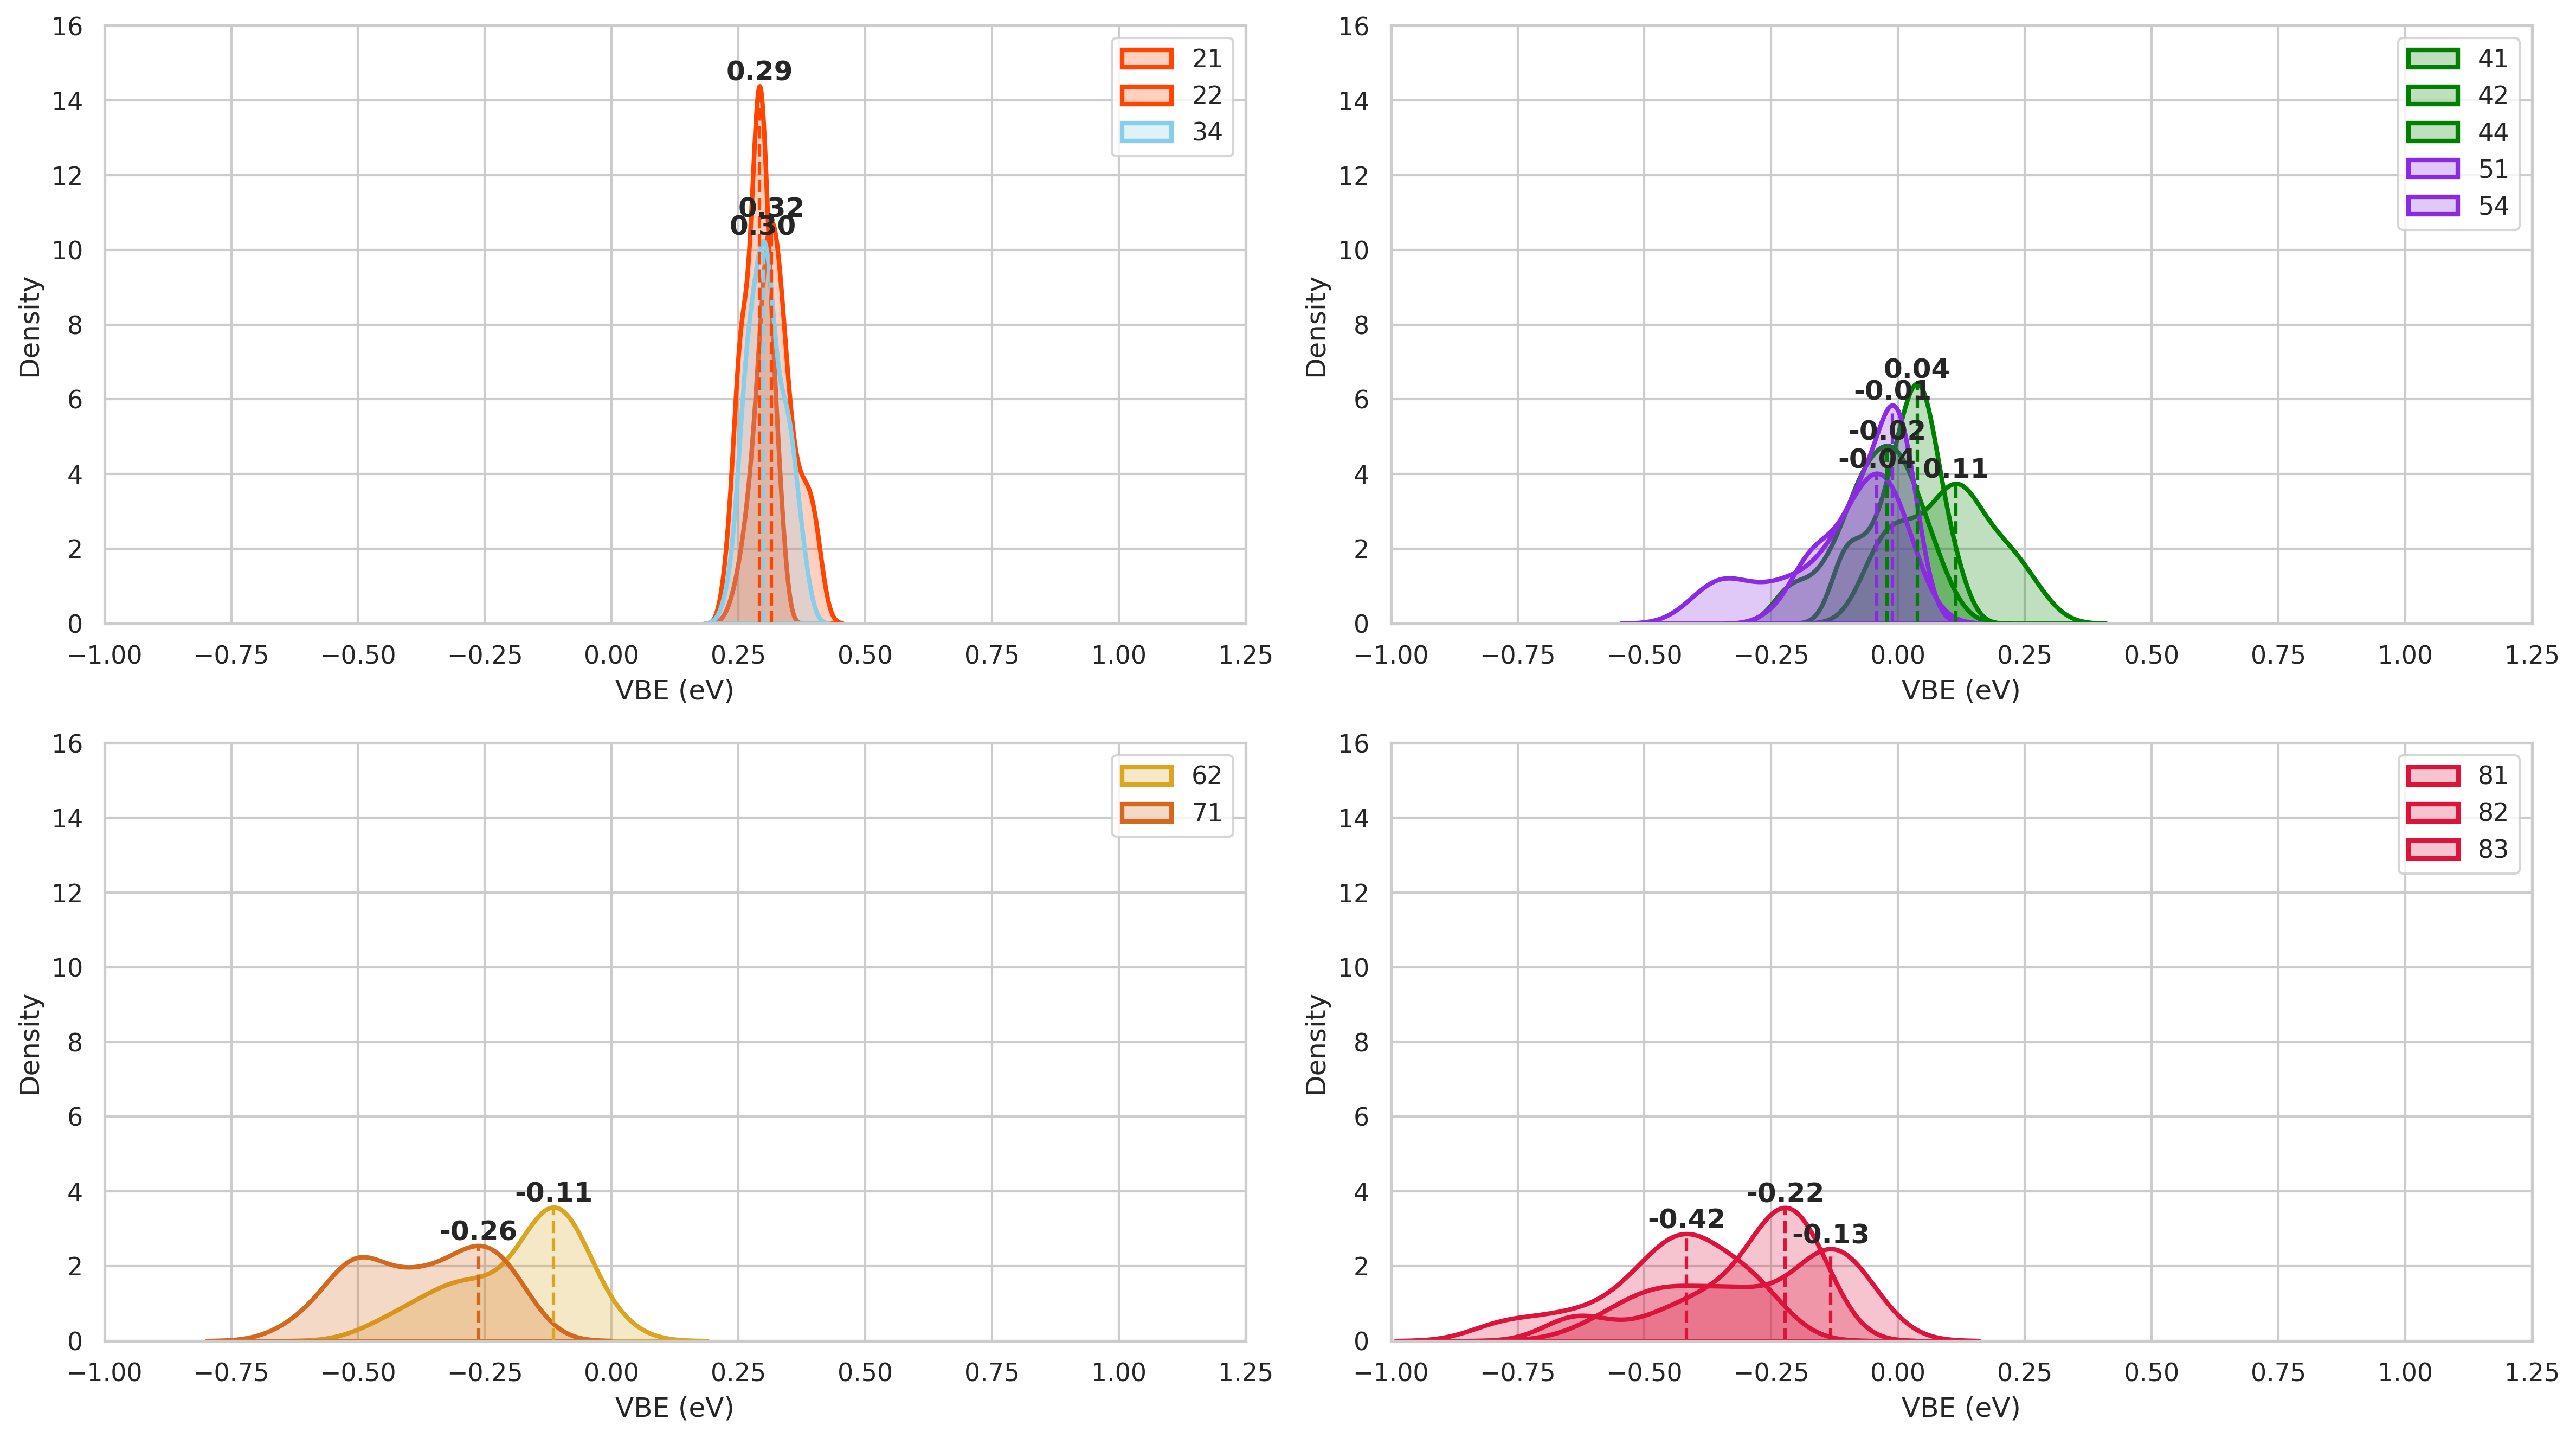

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Předpokládáme, že 'systems_b3lyp' je definován a obsahuje data, barvy a maximální hodnoty

# Nastavení stylu grafu
sns.set(style="whitegrid")

# Vytvoření figure a subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 9), dpi=300)

# Definování, které systémy půjdou do kterého subplotu
subplot_systems = {
    (0, 0): [21, 22, 34],
    (0, 1): [41, 42, 44, 51, 54],
    (1, 0): [62, 71],
    (1, 1): [81, 82, 83]
}

text_offsets = {
    21: (0.01, 0.01),
    22: (0.01, 0.01),
    34: (0.01, 0.01),
    41: (0.01, 0.01),
    42: (0.01, 0.01),
    44: (0.01, 0.01),
    51: (0.01, 0.01),
    54: (0.01, 0.01),
    62: (0.01, 0.01),
    71: (0.01, 0.01),
    81: (0.01, 0.01),
    82: (0.01, 0.01),
    83: (0.01, 0.01)
}

# Smyčka pro vykreslení KDE plotů pro každý subplot
for pos, systems in subplot_systems.items():
    ax = axs[pos]
    for system in systems:
        data = systems_b3lyp[system][0]
        sns.kdeplot(data=data, ax=ax, fill=True, lw=2, color=systems_b3lyp[system][1], label=f"{system}")
        peak_x = systems_b3lyp[system][2][1]
        peak_y = systems_b3lyp[system][2][0]
        ax.plot([peak_x, peak_x], [0, peak_y], color=systems_b3lyp[system][1], linestyle='--')
        ax.text(peak_x, peak_y, f'{peak_x:.2f}', ha='center', va='bottom', fontweight='bold')

    # Nastavení limitů a legendy pro každý subplot
    ax.set_ylim(0, 16)
    ax.set_xlim(-1, 1.25)
    ax.legend()

# Nastavení společných os pro všechny subplots
for ax in axs.flat:
    ax.set_xlabel('VBE (eV)')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.savefig("vde_subplot_b3lyp.png")
plt.show()

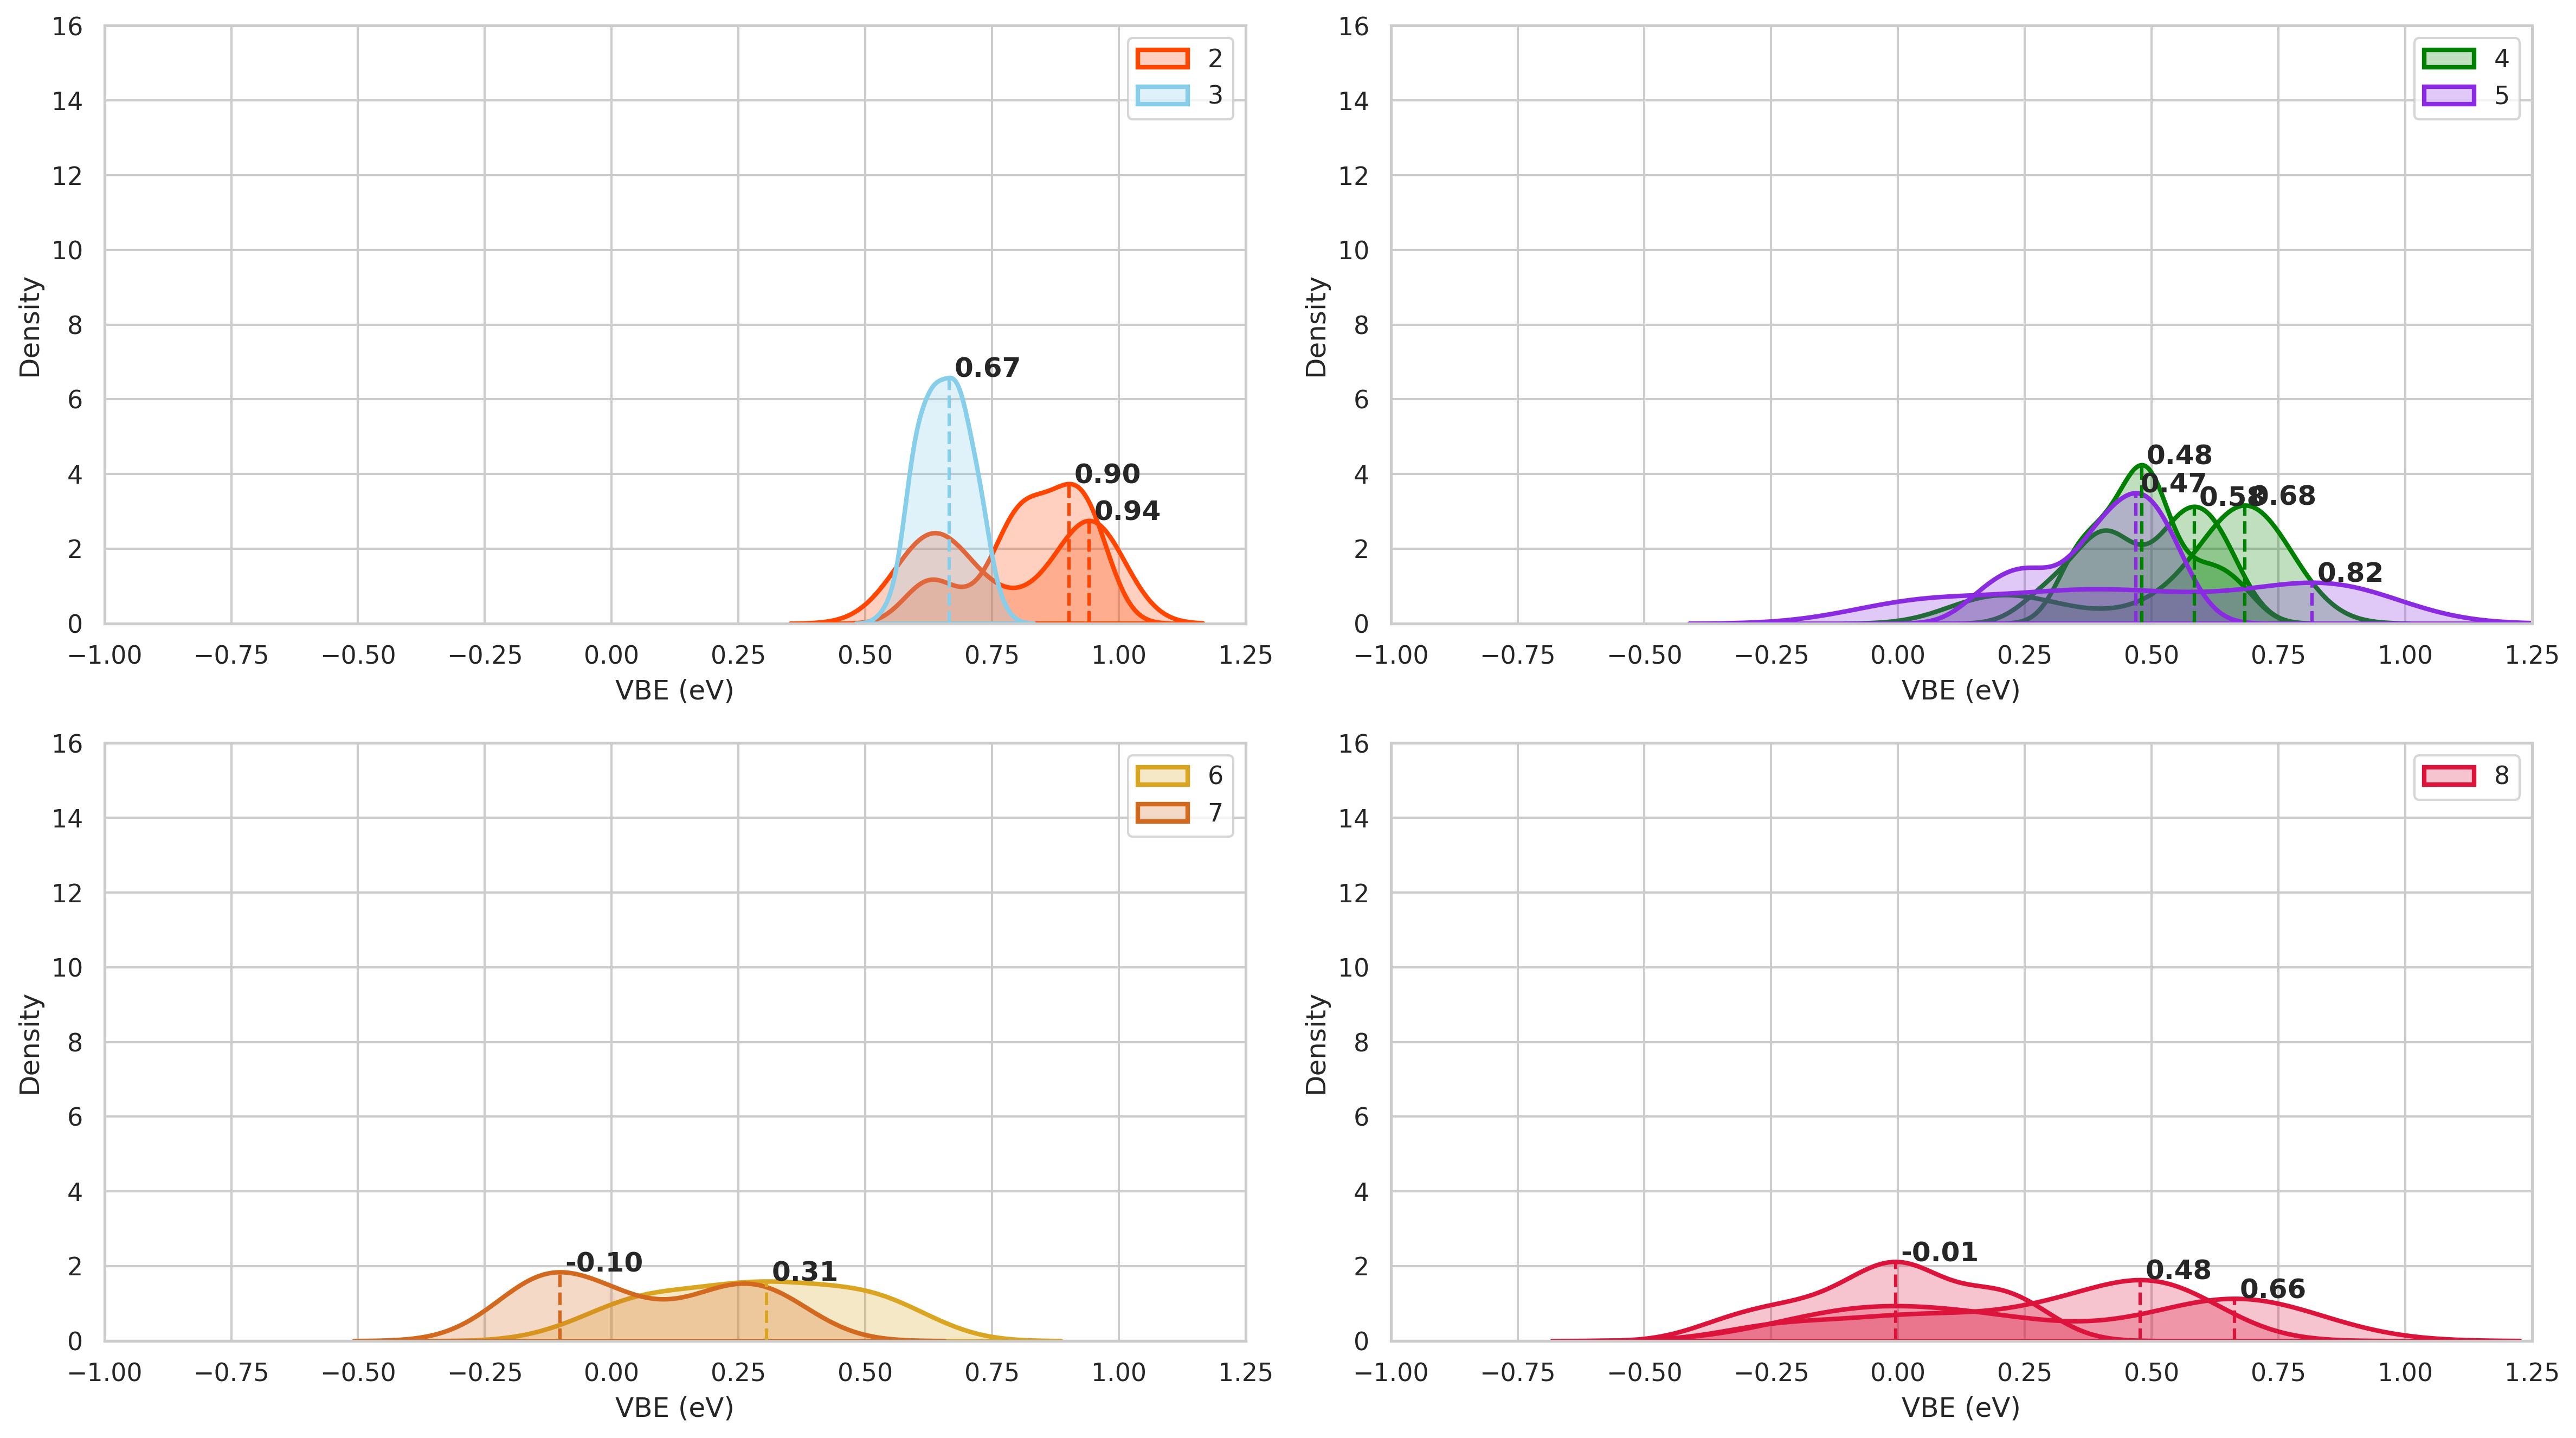

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definování, které systémy půjdou do kterého subplotu
subplot_systems = {
    (0, 0): [21, 22, 34],
    (0, 1): [41, 42, 44, 51, 54],
    (1, 0): [62, 71],
    (1, 1): [81, 82, 83]
}

text_offsets = {
    21: (0.01, 0.01),
    22: (0.01, 0.01),
    34: (0.01, 0.01),
    41: (0.01, 0.01),
    42: (0.01, 0.01),
    44: (0.01, 0.01),
    51: (0.01, 0.01),
    54: (0.01, 0.01),
    62: (0.01, 0.01),
    71: (0.01, 0.01),
    81: (0.01, 0.01),
    82: (0.01, 0.01),
    83: (0.01, 0.01)
}

system_groups = {
    21: '2', 22: '2',
    34: '3',
    41: '4', 42: '4', 44: '4',
    51: '5', 54: '5',
    62: '6',
    71: '7',
    81: '8', 82: '8', 83: '8'
}

# Nastavení stylu grafu
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 9), dpi=300)

# Smyčka pro vykreslení KDE plotů pro každý subplot
for pos, systems in subplot_systems.items():
    ax = axs[pos]
    legend_labels = set()  # Pro sledování použitých názvů v legendě
    for system in systems:
        data = systems_mp2[system][0]
        label = system_groups[system] if system_groups[system] not in legend_labels else ""
        sns.kdeplot(data=data, ax=ax, fill=True, lw=2, color=systems_mp2[system][1], label=label)
        peak_x = systems_mp2[system][2][1]
        peak_y = systems_mp2[system][2][0]
        ax.plot([peak_x, peak_x], [0, peak_y], color=systems_mp2[system][1], linestyle='--')
        offset_x, offset_y = text_offsets[system]
        ax.text(peak_x + offset_x, peak_y + offset_y, f'{peak_x:.2f}', fontweight='bold')#, color=systems_b3lyp[system][1])
        legend_labels.add(system_groups[system])

    ax.set_ylim(0, 16)
    ax.set_xlim(-1, 1.25)
    ax.legend()

# Nastavení společných os pro všechny subplots
for ax in axs.flat:
    ax.set_xlabel('VBE (eV)')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.savefig("vde_subplot_mp2.png")
plt.show()